<b style='font-size:26px;font-family:Arial;color:#E37C4D'>Text Analytics using 'teradatagenai' Package</b>

#### Disclaimer

The sample code (“Sample Code”) provided is not covered by any Teradata agreements. Please be aware that Teradata has no control over the model responses to such sample code and such response may vary. The use of the model by Teradata is strictly for demonstration purposes and does not constitute any form of certification or endorsement. The sample code is provided “AS IS” and any express or implied warranties, including the implied warranties of merchantability and fitness for a particular purpose, are disclaimed. In no event shall Teradata be liable for any direct, indirect, incidental, special, exemplary, or consequential damages (including, but not limited to, procurement of substitute goods or services; loss of use, data, or profits; or business interruption) sustained by you or a third party, however caused and on any theory of liability, whether in contract, strict liability, or tort arising in any way out of the use of this sample code, even if advised of the possibility of such damage.


<b style = 'font-size:22px;font-family:Arial;color:#E37C4D'>Setting Up the Environment</b>

Before we start working with our data, we need to set up our environment. This involves importing the necessary packages, establishing a connection to Vantage.

In [1]:
# Importing required packages
import sys
from teradatagenai import TeradataAI, TextAnalyticsAI, load_data
from teradataml import *
import getpass, os
from teradataml import *
from teradataml import create_context, set_config_params, list_base_envs, list_user_envs, create_env

In [ ]:
# Connecting to vantage using 'create_context()' from teradataml
user = getpass.getpass(prompt='Enter username: ')
password = getpass.getpass(prompt='Enter password: ')
host = getpass.getpass(prompt='Enter host: ')
eng = create_context(host=host, username=user, password=password)

<b style = 'font-size:22px;font-family:Arial;color:#E37C4D'>Loading the data</b>

We will be loading the sample employee data using the 'load_data()' helper function. 
To utilize the TextAnalyticsAI functions effectively, we first need to organize our data appropriately.
We are particularly interested in the 'articles', 'reviews', 'quotes', and 'employee_data' columns for each 'employee_id' and 'employee_name' in our dataframe.

To streamline this process, we will generate individual dataframes for each of these columns:


In [ ]:
load_data('employee', 'employee_data')

In [ ]:
df=DataFrame('employee_data')

In [ ]:
# Create separate DataFrames for articles, reviews, quotes, and employee data.
df_articles = df.select(["employee_id", "employee_name", "articles"])
df_reviews = df.select(["employee_id", "employee_name", "reviews"])
df_quotes = df.select(["employee_id", "employee_name", "quotes"])
df_employeeData = df.select(["employee_id", "employee_name", "employee_data"])
df_classify_articles = df.select(["employee_id", "articles"])

<b style = 'font-size:22px;font-family:Arial;color:#E37C4D'>Teradata Python package for Generative-AI</b>

The teradatagenai is a Python library designed for seamless AI-driven operations using data from Vantage, allowing users to choose their preferred LLM. 
We will be using BYO LLM offering of Teradata to perform various text analytics operations on data stored in Vantage. 
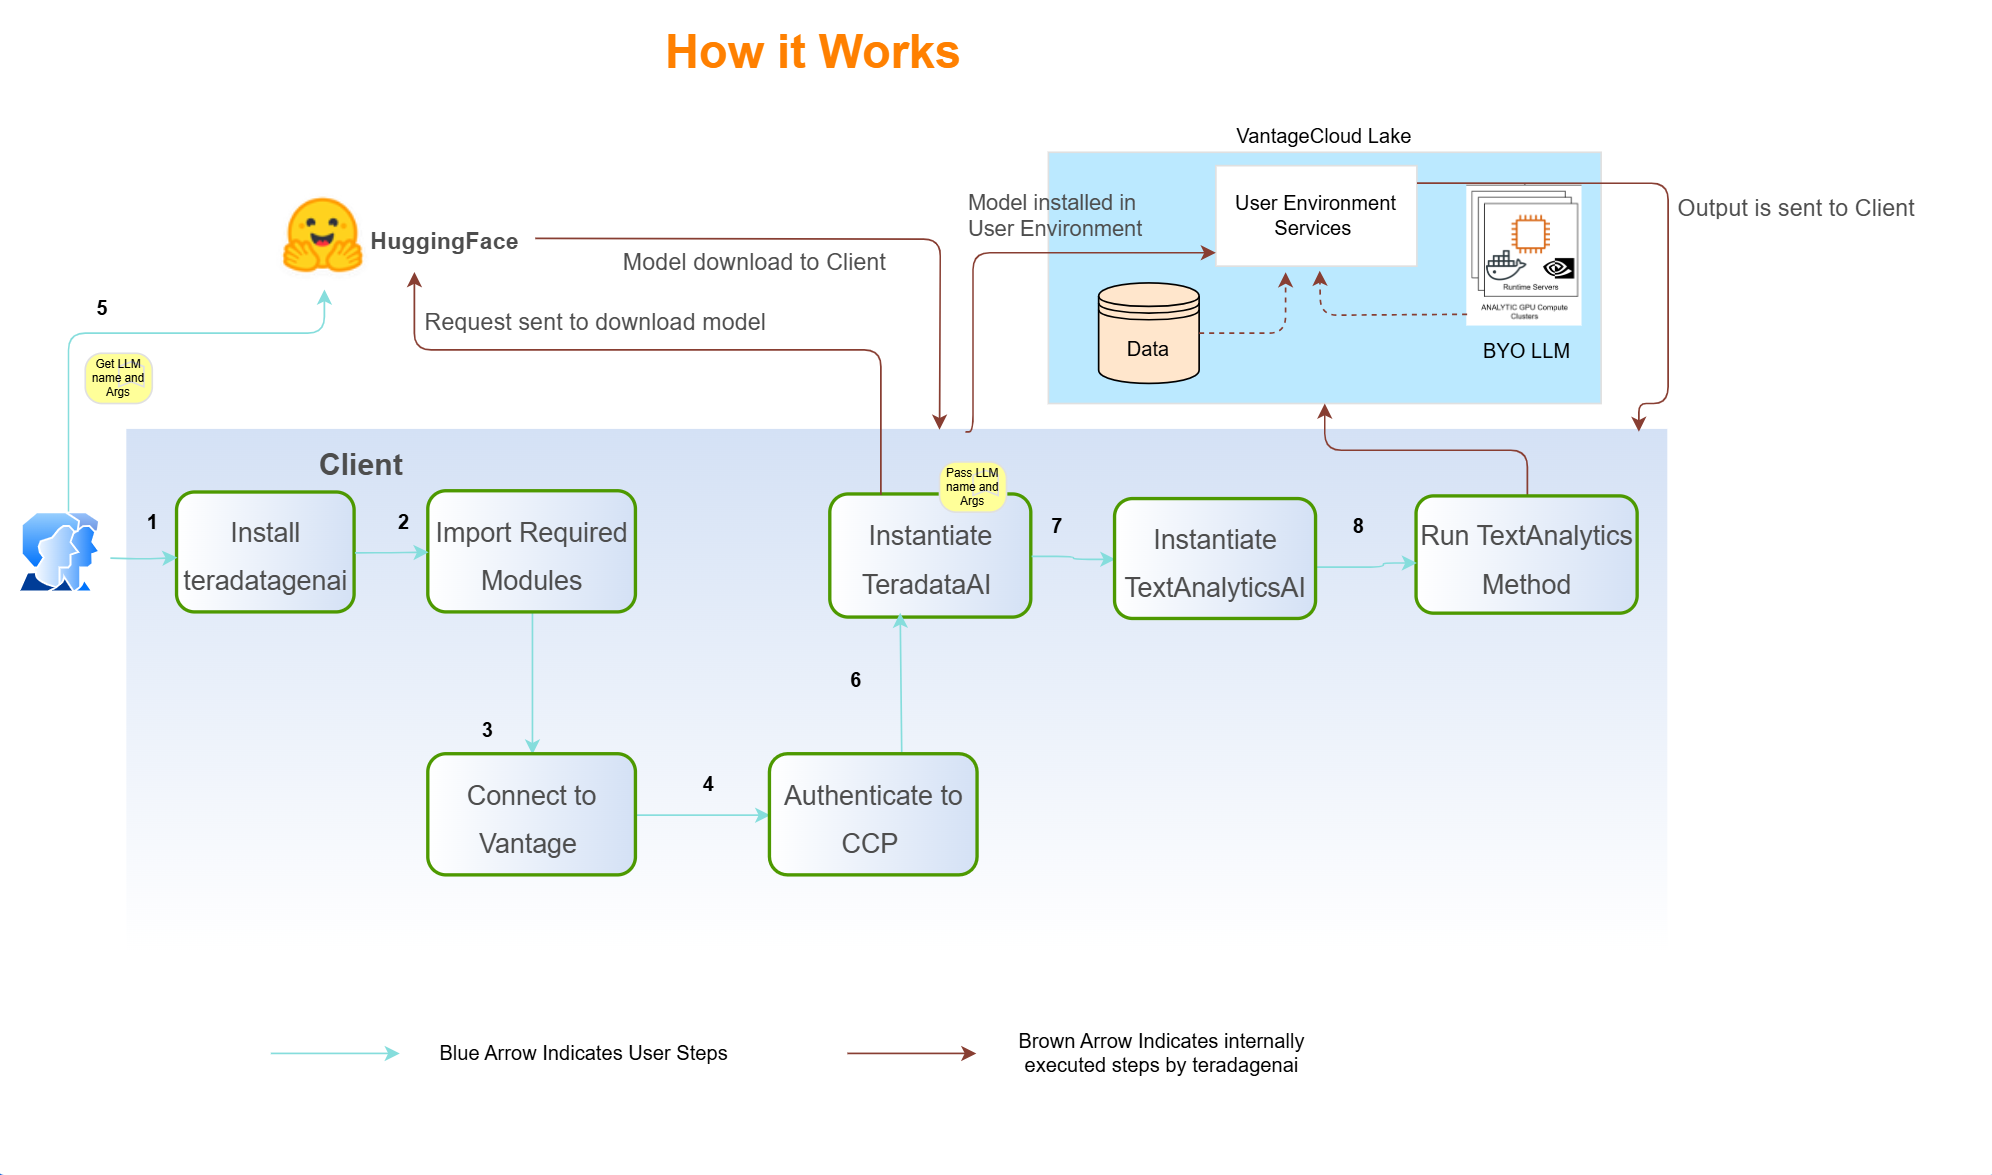

In [ ]:
# Authenticate CCP to use BYO LLM offering of Teradata
auth_token = getpass.getpass(prompt='Enter auth token: ')
account_id = getpass.getpass(prompt='Enter account ID: ')
pod = getpass.getpass(prompt='Enter pod: ')
ues_url = f"https://teracloud-pod-services-pod-account-service.{pod}.production.pods.teracloud.ninja/v1/accounts/{account_id}/user-environment-service/api/v1/"
set_auth_token(auth_token=auth_token, ues_url=ues_url)

In [ ]:
# Listing the available base environments to confirm that the CCP authentication was successful 
print(list_base_envs())

     base_name language  version
0   python_3.9   Python   3.9.20
1  python_3.10   Python  3.10.15
2  python_3.11   Python  3.11.10
3        r_4.1        R    4.1.3
4        r_4.0        R    4.0.5
5        r_4.2        R    4.2.2


<b style='font-size:26px;font-family:Arial;color:#E37C4D'>1. Sentiment Analysis</b>

In this section, we'll explore the `analyze_sentiment()` function provided by teradatagenai.

To use this function, we will first need access to the Hugging Face model. In the example, we will be using the 'bhadresh-savani/distilbert-base-uncased-emotion' model. The details of the same can be found  [*here*](https://huggingface.co/).

In [ ]:
# Acess LLM endpoint
model_name = 'bhadresh-savani/distilbert-base-uncased-emotion'
model_args = {'transformer_class': 'AutoModelForSequenceClassification',
      'task' : 'text-classification'}

<b style='font-size:22px;font-family:Arial;color:#E37C4D'>Setting up the TeradataAI class</b>

TeradataAI handles the download and installation of the Hugging Face model (example: <i>'bhadresh-savani/distilbert-base-uncased-emotion'</i>) in the user's environment. Incase the environment is not specified, a sample environment named <i>'td_gen_ai_env'</i> is created with the necessary requirements. Alternatively, the user can provide arguments for a custom environment. The TeradataAI class will manage the entire setup process. In the background, this process utilizes Teradata’s Bring Your Own Large Language Model (BYO LLM) offering.

Any errors encountered during the initialization of TeradataAI class will point to the failure in downloading the model from Hugging Face.

<b style='font-size:18px;font-family:Arial;color:#E37C4D'>Note:</b>
The initial setup will take some time depending on the bandwidth.


In [ ]:
llm = TeradataAI(api_type = "hugging_face",
         model_name = model_name,
         model_args = model_args)

Using env: 'td_gen_ai_env'.


c:\Users\sb255122\AppData\Local\anaconda3\envs\genairc\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Model download started.
Model download completed.
Model installation is initiated. Check the status using status() with the claim id 52dae60a-6ec4-43eb-b1a9-3591c13953b0.
Model installation started.
Model Installation completed.                                                       


<b style='font-size:22px;font-family:Arial;color:#E37C4D'>Setting up the TextAnalyticsAI class</b>

TextAnalyticsAI enables users to leverage advanced text analytics capabilities seamlessly on data stored in Vantage.​

We will configure the TextAnalyticsAI object with the preferred large language model using the TeradataAI object. This will enable us to execute a variety of text analytics tasks.


In [ ]:
# Create a TextAnalyticsAI object.
obj = TextAnalyticsAI(llm=llm)

File 'td_sample_inference_script.py' replaced successfully in the remote user environment 'td_gen_ai_env'.
File 'td_sample_embeddings_script.py' replaced successfully in the remote user environment 'td_gen_ai_env'.


In [ ]:
# Using the default script
obj.analyze_sentiment(column='reviews', data=df_reviews, delimiter="#")

text,Sentiment
The food was average and the delivery person was rude,"[{'label': 'anger', 'score': 0.9979689717292786}]"
Both the food and the delivery service were topnotch,"[{'label': 'anger', 'score': 0.9234364032745361}]"
The delivery was prompt but the food was spilled and the portion size was small,"[{'label': 'anger', 'score': 0.9261348247528076}]"
Todays food delivery was quicker than yesterdays Appreciated it,"[{'label': 'joy', 'score': 0.9902466535568237}]"
The food was excellent but it arrived a bit late,"[{'label': 'joy', 'score': 0.9982774257659912}]"


In [ ]:
# Using a user defined script.
base_dir = os.path.dirname(teradatagenai.__file__)
analyze_sentiment_script = os.path.join(base_dir, 'example-data', 'analyze_sentiment.py')
obj.analyze_sentiment(column="reviews", data=df_reviews, script=analyze_sentiment_script, delimiter="#")

File 'analyze_sentiment.py' replaced successfully in the remote user environment 'td_gen_ai_env'.


text,Sentiment
Both the food and the delivery service were topnotch,anger
The food was excellent but it arrived a bit late,joy
The delivery was prompt but the food was spilled and the portion size was small,anger
Todays food delivery was quicker than yesterdays Appreciated it,joy
The food was average and the delivery person was rude,anger


In [ ]:
# Using sample_script with output_labels.
obj.analyze_sentiment(column='reviews', data=df_reviews,
output_labels={'label': str, 'score': float}, delimiter="#")

text,label,score
Todays food delivery was quicker than yesterdays Appreciated it,joy,0.9902466535568237
The food was excellent but it arrived a bit late,joy,0.9982774257659912
The food was average and the delivery person was rude,anger,0.9979689717292786
Both the food and the delivery service were topnotch,anger,0.9234364032745361
The delivery was prompt but the food was spilled and the portion size was small,anger,0.9261348247528076


### 2. KeyPhrase Extraction

In this section, we'll explore the `extract_key_phrases()` function provided by teradatagenai. This function is used to extract key phrases from a given text. These key phrases can provide a quick understanding of the main concepts in the text.


In [ ]:
# Accessing the LLM endpoint and initializing the TeradataAI and TextAnalyticsAI
model_name = 'ml6team/keyphrase-extraction-kbir-kpcrowd'
model_args = {'transformer_class': 'AutoModelForTokenClassification',
      'task' : 'text-classification'} 
llm = TeradataAI(api_type = "hugging_face",
         model_name = model_name,
         model_args = model_args)
obj = TextAnalyticsAI(llm=llm)

Using env: 'td_gen_ai_env'.
Model is already available in the user environment.


In [ ]:
# Default script is used
obj.extract_key_phrases(column="articles", data=df_articles, delimiter="#")

File 'td_sample_inference_script.py' replaced successfully in the remote user environment 'td_gen_ai_env'.
File 'td_sample_embeddings_script.py' replaced successfully in the remote user environment 'td_gen_ai_env'.
python td_sample_inference_script.py keyphrase-extraction-kbir-kpcrowd AutoModelForTokenClassification text-classification "{\"target_lang\": \"English\", \"delimiter\": \"#\", \"func_name\": \"extract_key_phrases\"}"


text,Key_Phrases
The 2019 Amazon rainforest wildfires were a severe environmental crisis The fires burned thousands o,"[{'label': 'O', 'score': 0.49583756923675537}]"
Climate change poses significant challenges globally affecting weather patterns ecosystems and human,"[{'label': 'B-KEY', 'score': 0.40098002552986145}]"
The 2020 Tokyo Olympics was postponed to 2021 due to the COVID-19 pandemic This was the first time i,"[{'label': 'I-KEY', 'score': 0.3822733461856842}]"
The recent 2020 United States elections have shown a shift in the political landscape With more youn,"[{'label': 'B-KEY', 'score': 0.453649640083313}]"
Renewable energy sources such as solar wind and hydroelectric power play a crucial role in reducing,"[{'label': 'I-KEY', 'score': 0.5478391647338867}]"


In [ ]:
# Using a user defined script.
base_dir = os.path.dirname(teradatagenai.__file__)
extract_key_phrases_script = os.path.join(base_dir, 'example-data', 'extract_key_phrases.py')
obj.extract_key_phrases(column="articles", data=df_articles, script=extract_key_phrases_script, delimiter="#")

File 'extract_key_phrases.py' replaced successfully in the remote user environment 'td_gen_ai_env'.


text,Key_Phrases
The 2020 Tokyo Olympics was postponed to 2021 due to the COVID-19 pandemic This was the first time i,"2020 Tokyo Olympics, 2021 due, COVID-19, first time, pandemic, postponed"
The recent 2020 United States elections have shown a shift in the political landscape With more youn,"States, elections, political landscape, recent 2020, shift, shown"
Renewable energy sources such as solar wind and hydroelectric power play a crucial role in reducing,"Renewable energy sources, crucial role, hydroelectric power, play, reducing, solar wind"
Climate change poses significant challenges globally affecting weather patterns ecosystems and human,"Climate change, ecosystems, human, significant challenges globally affecting weather patterns"
The 2019 Amazon rainforest wildfires were a severe environmental crisis The fires burned thousands o,"2019, Amazon rainforest wildfires, environmental crisis, fires burned thousands, severe"


# 3. Recongnize entities
In this section, we delve into the `recognize_entities()` function, provided by TextAnalyticsAI. This function is designed to identify a wide range of entities within text data. These entities can include 'people', 'places', 'products', 'organizations', 'date/time', 'quantities', 'percentages', 'currencies', and 'names'.


In [ ]:
# # Accessing the LLM endpoint and initializing TeradataAI and TextAnalyticsAI
model_name = 'tner/roberta-large-ontonotes5'
model_args = {'transformer_class': 'AutoModelForTokenClassification',
              'task' : 'token-classification'}
llm = TeradataAI(api_type = "hugging_face",
                 model_name = model_name,
                 model_args = model_args)
obj = TextAnalyticsAI(llm=llm)

Using env: 'td_gen_ai_env'.
Model download started.
Model download completed.
Model installation is initiated. Check the status using status() with the claim id a5b18e4e-f45b-4e11-b87d-235b05030275.
Model installation started.
Model Installation completed.                                                       
File 'td_sample_inference_script.py' replaced successfully in the remote user environment 'td_gen_ai_env'.
File 'td_sample_embeddings_script.py' replaced successfully in the remote user environment 'td_gen_ai_env'.


In [ ]:
# Default script is used
obj.recognize_entities(column='articles', data=df_articles, delimiter="#")

File 'td_sample_inference_script.py' replaced successfully in the remote user environment 'td_gen_ai_env'.


text,Labeled_Entities
Renewable energy sources such as solar wind and hydroelectric power play a crucial role in reducing,[]
Climate change poses significant challenges globally affecting weather patterns ecosystems and human,[]
The 2020 Tokyo Olympics was postponed to 2021 due to the COVID-19 pandemic This was the first time i,"[{'entity': 'B-DATE', 'score': np.float32(0.910138), 'index': 2, 'word': 'Äš2020', 'start': 4, 'end': 8}, {'entity': 'B-EVENT', 'score': np.float32(0.9909637), 'index': 3, 'word': 'ÄšTokyo', 'start': 9, 'end': 14}, {'entity': 'I-EVENT', 'score': np.float32(0.9921257), 'index': 4, 'word': 'ÄšOlympics', 'start': 15, 'end': 23}, {'entity': 'B-DATE', 'score': np.float32(0.99836355), 'index': 8, 'word': 'Äš2021', 'start': 41, 'end': 45}, {'entity': 'B-EVENT', 'score': np.float32(0.97382385), 'index': 12, 'word': 'ÄšCO', 'start': 57, 'end': 59}, {'entity': 'I-EVENT', 'score': np.float32(0.98586243), 'index': 13, 'word': 'VID', 'start': 59, 'end': 62}, {'entity': 'I-EVENT', 'score': np.float32(0.963148), 'index': 14, 'word': '-', 'start': 62, 'end': 63}, {'entity': 'I-EVENT', 'score': np.float32(0.97411186), 'index': 15, 'word': '19', 'start': 63, 'end': 65}, {'entity': 'B-ORDINAL', 'score': np.float32(0.9906889), 'index': 21, 'word': 'Äšfirst', 'start': 88, 'end': 93}]"
The recent 2020 United States elections have shown a shift in the political landscape With more youn,"[{'entity': 'B-DATE', 'score': np.float32(0.99678516), 'index': 3, 'word': 'Äš2020', 'start': 11, 'end': 15}, {'entity': 'B-GPE', 'score': np.float32(0.999946), 'index': 4, 'word': 'ÄšUnited', 'start': 16, 'end': 22}, {'entity': 'I-GPE', 'score': np.float32(0.9999733), 'index': 5, 'word': 'ÄšStates', 'start': 23, 'end': 29}]"
The 2019 Amazon rainforest wildfires were a severe environmental crisis The fires burned thousands o,"[{'entity': 'B-DATE', 'score': np.float32(0.99940646), 'index': 2, 'word': 'Äš2019', 'start': 4, 'end': 8}, {'entity': 'B-LOC', 'score': np.float32(0.9994789), 'index': 3, 'word': 'ÄšAmazon', 'start': 9, 'end': 15}, {'entity': 'B-CARDINAL', 'score': np.float32(0.9113434), 'index': 15, 'word': 'Äšthousands', 'start': 89, 'end': 98}]"


In [ ]:
#  use user_defined script for inferencing along with returns argument 
base_dir = os.path.dirname(teradatagenai.__file__)
entity_recognition_script = os.path.join(base_dir, 'example-data', 'entity_recognition.py')
obj.recognize_entities(column='articles',
                                       returns = {"text": VARCHAR(64000),
                                                  "ORG": VARCHAR(64000),
                                                  "PERSON": VARCHAR(64000),
                                                  "DATE1": VARCHAR(64000),
                                                  "PRODUCT": VARCHAR(64000),
                                                  "GPE": VARCHAR(64000),
                                                  "EVENT": VARCHAR(64000),
                                                  "LOC": VARCHAR(64000),
                                                  "WORK_OF_ART": VARCHAR(64000)},
                                       data=df_articles,
                                       script = entity_recognition_script, delimiter="#")

File 'entity_recognition.py' replaced successfully in the remote user environment 'td_gen_ai_env'.


text,ORG,PERSON,DATE1,PRODUCT,GPE,EVENT,LOC,WORK_OF_ART
Renewable energy sources such as solar wind and hydroelectric power play a crucial role in reducing,None,None,None,None,None,None,None,None
The 2019 Amazon rainforest wildfires were a severe environmental crisis The fires burned thousands o,None,None,2019,None,None,None,Amazon,None
The 2020 Tokyo Olympics was postponed to 2021 due to the COVID-19 pandemic This was the first time i,None,None,"2020, 2021",None,None,"Tokyo Olympics, COVID-19",None,None
Climate change poses significant challenges globally affecting weather patterns ecosystems and human,None,None,None,None,None,None,None,None
The recent 2020 United States elections have shown a shift in the political landscape With more youn,None,None,2020,None,United States,None,None,None


# 4. Language detection
In this section, we'll explore the `detect_language()` function provided by TextAnalyticsAI. This function is used to identify the language of a given text.

In [ ]:
# Accessing the LLM endpoint and initializing the TeradataAI and TextAnalyticsAI
model_name = 'papluca/xlm-roberta-base-language-detection'
model_args = {'transformer_class': 'AutoModelForSequenceClassification', 'task' : 'text-classification'}
ues_args = {'env_name' : 'oaf_demo_aanchal1'}
llm = TeradataAI(api_type = "hugging_face",
     model_name = model_name,
     model_args = model_args,
     ues_args = ues_args)
obj = TextAnalyticsAI(llm=llm)

Using env: 'oaf_demo_aanchal1'.
Model is already available in the user environment.


In [ ]:
# Default script is used
obj.detect_language(column="quotes", data=df_quotes, delimiter="#")

File 'td_sample_inference_script.py' replaced successfully in the remote user environment 'oaf_demo_aanchal1'.


text,language1
Apres la pluie le beau temps,"[{'label': 'fr', 'score': 0.9922717809677124}]"
El tiempo es oro,"[{'label': 'es', 'score': 0.9926148653030396}]"
Wees de verandering die je in de wereld wil zien gebeuren,"[{'label': 'nl', 'score': 0.9953699707984924}]"
La vie est belle,"[{'label': 'fr', 'score': 0.9304302930831909}]"
Geniet van de kleine dingen.,"[{'label': 'nl', 'score': 0.995890736579895}]"


In [ ]:
# output_labels argument is specified along with the default script
obj.detect_language(column='quotes', data=df_quotes, output_labels={'label': str, 'score': float}, delimiter="#")

File 'td_sample_inference_script.py' replaced successfully in the remote user environment 'oaf_demo_aanchal1'.


text,label,score
Apres la pluie le beau temps,fr,0.9922717809677124
Wees de verandering die je in de wereld wil zien gebeuren,nl,0.9953699707984924
La vie est belle,fr,0.9304302930831909
El tiempo es oro,es,0.9926148653030396
Geniet van de kleine dingen.,nl,0.995890736579895


# 5. Text Summarization
In this section, we'll explore the `summarize()` function provided by TextAnalyticsAI. This function is used to generate a concise summary of a given text. 


In [ ]:
# Accessing the LLM endpoint and initializing TeradataAI and TextAnalyticsAI
model_name = 'facebook/bart-large-cnn'
model_args = {'transformer_class': 'AutoModelForSeq2SeqLM', 'task' : 'summarization'}
llm = TeradataAI(api_type = "hugging_face",
model_name = model_name,
model_args = model_args)
obj = TextAnalyticsAI(llm=llm)

Using env: '
Environment Name: oaf_demo_aanchal1
Base Environment: python_3.11
Description: This env 'oaf_demo_aanchal1' is created with base env 'python_3.11'.

############ Files installed in User Environment ############

                            File  Size             Timestamp
0              summarize_text.py  1212  2024-12-09T17:49:52Z
1  td_sample_inference_script.py  1696  2024-12-11T09:03:17Z
2         sentence_similarity.py  2719  2024-12-10T09:57:24Z
3        sample_python_script.py  1101  2024-11-25T15:37:22Z
4               classify_text.py  1484  2024-11-29T14:49:11Z
5             detect_language.py  1664  2024-11-14T12:36:31Z

############ Libraries installed in User Environment ############

                        name     version
0                    certifi   2024.8.30
1         charset-normalizer       3.4.0
2                   filelock      3.16.1
3                     fsspec   2024.10.0
4            huggingface-hub      0.26.2
5                       idna      

In [ ]:
# Using default script
obj.summarize(column='articles', data=df_articles, quotechar="|", delimiter="#")

File 'td_sample_inference_script.py' replaced successfully in the remote user environment 'oaf_demo_aanchal1'.


text,Summarized_Text
The recent 2020 United States elections have shown a shift in the political landscape With more youn,"[{'summary_text': 'The recent 2020 U.S. elections have shown a shift in the political landscape. With more youn, you can find out more at CNN.com/Heroes. For more information on CNN Heroes, visit www.cnn.com/. For more on the 2020 United States elections, go to CNN iReport.'}]"
Renewable energy sources such as solar wind and hydroelectric power play a crucial role in reducing,"[{'summary_text': ""Renewable energy sources such as solar wind and hydroelectric power play a crucial role in reducing carbon dioxide emissions. The U.S. has the highest level of carbon emissions in the world, according to the U.N. Carbon dioxide emissions are the highest in the United States. The world's carbon dioxide levels are the lowest in the developed world.""}]"
The 2020 Tokyo Olympics was postponed to 2021 due to the COVID-19 pandemic This was the first time i,"[{'summary_text': 'The 2020 Tokyo Olympics was postponed to 2021 due to the COVID-19 pandemic. This was the first time the Olympics had been postponed due to a pandemic in Japan. The 2020 Olympics were originally scheduled to be held in Tokyo, Japan, in 2020. The Olympics were postponed because of the pandemic, which was caused by a virus.'}]"
Climate change poses significant challenges globally affecting weather patterns ecosystems and human,"[{'summary_text': 'Climate change poses significant challenges globally affecting weather patterns ecosystems and human life. Climate change poses major challenges to global ecosystems, ecosystems, and human lives. Global warming will affect weather patterns and ecosystems, according to the World Resources Institute. The U.S. Geological Survey has released a report on the effects of climate change on the environment.'}]"
The 2019 Amazon rainforest wildfires were a severe environmental crisis The fires burned thousands o,"[{'summary_text': ""The 2019 Amazon rainforest wildfires were a severe environmental crisis. The fires burned thousands of acres of rainforest. The forest was devastated by the forest fires, which were sparked by lightning. The forests are home to more than 1.5 billion people. The Amazon is one of the world's largest rainforests.""}]"


In [ ]:
# Using a user defined script.
base_dir = os.path.dirname(teradatagenai.__file__)
summarization_script = os.path.join(base_dir, 'example-data', 'summarize_text.py')
obj.summarize(column='articles',
       returns = {"text": VARCHAR(10000),
       "summarized_text": VARCHAR(10000)},
       data=df_articles,
       script = summarization_script, quotechar="|", delimiter="#")

File 'summarize_text.py' replaced successfully in the remote user environment 'oaf_demo_aanchal1'.


text,summarized_text
The recent 2020 United States elections have shown a shift in the political landscape With more youn,"The recent 2020 U.S. elections have shown a shift in the political landscape. With more youn, you can find out more at CNN.com/Heroes. For more information on CNN Heroes, visit www.cnn.com/. For more on the 2020 United States elections, go to CNN iReport."
Climate change poses significant challenges globally affecting weather patterns ecosystems and human,"Climate change poses significant challenges globally affecting weather patterns ecosystems and human life. Climate change poses major challenges to global ecosystems, ecosystems, and human lives. Global warming will affect weather patterns and ecosystems, according to the World Resources Institute. The U.S. Geological Survey has released a report on the effects of climate change on the environment."
Renewable energy sources such as solar wind and hydroelectric power play a crucial role in reducing,"Renewable energy sources such as solar wind and hydroelectric power play a crucial role in reducing carbon dioxide emissions. The U.S. has the highest level of carbon emissions in the world, according to the U.N. Carbon dioxide emissions are the highest in the United States. The world's carbon dioxide levels are the lowest in the developed world."
The 2019 Amazon rainforest wildfires were a severe environmental crisis The fires burned thousands o,"The 2019 Amazon rainforest wildfires were a severe environmental crisis. The fires burned thousands of acres of rainforest. The forest was devastated by the forest fires, which were sparked by lightning. The forests are home to more than 1.5 billion people. The Amazon is one of the world's largest rainforests."
The 2020 Tokyo Olympics was postponed to 2021 due to the COVID-19 pandemic This was the first time i,"The 2020 Tokyo Olympics was postponed to 2021 due to the COVID-19 pandemic. This was the first time the Olympics had been postponed due to a pandemic in Japan. The 2020 Olympics were originally scheduled to be held in Tokyo, Japan, in 2020. The Olympics were postponed because of the pandemic, which was caused by a virus."


# 6. Text Classification
In this section, we'll explore the `classify()` function provided by TextAnalyticsAI. This function is used to classify the given text.


In [ ]:
# Accessing the LLM endpoint and initializing TeradataAI and TextAnalyticsAI
model_name = 'facebook/bart-large-mnli'
model_args = {'transformer_class': 'AutoModelForSequenceClassification', 'task' : 'zero-shot-classification'}
llm = TeradataAI(api_type = "hugging_face",
         model_name = model_name,
         model_args = model_args)
obj = TextAnalyticsAI(llm=llm)

Using env: 'td_gen_ai_env'.
Model is already available in the user environment.


In [ ]:
# Using default script
label = ["Medical", "hospital", "healthcare", "historicalNews",
         "Environment", "technology", "Games"]
obj.classify("articles", df_classify_articles, labels=label, delimiter="#")

text,Labels
The recent 2020 United States elections have shown a shift in the political landscape With more youn,"{'sequence': 'The recent 2020 United States elections have shown a shift in the political landscape With more youn', 'labels': ['historicalNews', 'Games', 'hospital', 'Environment', 'technology', 'Medical', 'healthcare'], 'scores': [0.2219141572713852, 0.18781757354736328, 0.18410125374794006, 0.157247394323349, 0.08474085479974747, 0.08211186528205872, 0.0820668488740921]}"
The 2019 Amazon rainforest wildfires were a severe environmental crisis The fires burned thousands o,"{'sequence': 'The 2019 Amazon rainforest wildfires were a severe environmental crisis The fires burned thousands o', 'labels': ['Environment', 'historicalNews', 'Games', 'Medical', 'hospital', 'technology', 'healthcare'], 'scores': [0.8475484848022461, 0.07286490499973297, 0.03330129012465477, 0.014091618359088898, 0.012927068397402763, 0.010838040150702, 0.008428608998656273]}"
Renewable energy sources such as solar wind and hydroelectric power play a crucial role in reducing,"{'sequence': 'Renewable energy sources such as solar wind and hydroelectric power play a crucial role in reducing ', 'labels': ['technology', 'Environment', 'Games', 'historicalNews', 'Medical', 'hospital', 'healthcare'], 'scores': [0.6401532292366028, 0.21753348410129547, 0.045335788279771805, 0.04430738463997841, 0.024098196998238564, 0.0182021614164114, 0.010369792580604553]}"
The 2020 Tokyo Olympics was postponed to 2021 due to the COVID-19 pandemic This was the first time i,"{'sequence': 'The 2020 Tokyo Olympics was postponed to 2021 due to the COVID-19 pandemic This was the first time i', 'labels': ['Games', 'historicalNews', 'Environment', 'Medical', 'technology', 'healthcare', 'hospital'], 'scores': [0.7579749822616577, 0.10658492147922516, 0.04014146327972412, 0.029473936185240746, 0.023510770872235298, 0.022025825455784798, 0.020288145169615746]}"
Climate change poses significant challenges globally affecting weather patterns ecosystems and human,"{'sequence': 'Climate change poses significant challenges globally affecting weather patterns ecosystems and human', 'labels': ['Environment', 'historicalNews', 'Games', 'hospital', 'Medical', 'technology', 'healthcare'], 'scores': [0.7869754433631897, 0.08319485187530518, 0.06480303406715393, 0.024431703612208366, 0.015910524874925613, 0.013035607524216175, 0.011648806743323803]}"


In [ ]:
# Using a user defined script.
base_dir = os.path.dirname(teradatagenai.__file__)
classify_script = os.path.join(base_dir, 'example-data', 'classify_text.py')

obj.classify("articles",
             df_classify_articles,
             labels=["Medical", "Hospitality", "Healthcare",
                     "historical-news", "Games",
                     "Environment", "Technology",
                     "Games"], script=classify_script, delimiter="#")

File 'classify_text.py' replaced successfully in the remote user environment 'td_gen_ai_env'.


text,Labels
Climate change poses significant challenges globally affecting weather patterns ecosystems and human,Environment
Renewable energy sources such as solar wind and hydroelectric power play a crucial role in reducing,Technology
The 2020 Tokyo Olympics was postponed to 2021 due to the COVID-19 pandemic This was the first time i,Games
The 2019 Amazon rainforest wildfires were a severe environmental crisis The fires burned thousands o,Environment
The recent 2020 United States elections have shown a shift in the political landscape With more youn,historical-news


## 7. Language Translation
In this section, we'll explore the `translate()` function provided by TextAnalyticsAI. This function is used to translate the language of a given text.


In [ ]:
# Acessing the LLM endpoint and initializing TeradataAI and TextAnalyticsAI
model_name = 'Helsinki-NLP/opus-mt-en-fr'
model_args = {'transformer_class': 'AutoModelForSeq2SeqLM', 'task' : 'translation'}

llm = TeradataAI(api_type = "hugging_face",
         model_name = model_name,
         model_args = model_args)
obj = TextAnalyticsAI(llm=llm)


Using env: 'td_gen_ai_env'.
Model is already available in the user environment.


In [ ]:
# Default script is used
obj.translate(column="quotes", data=df_quotes, target_lang="French", delimiter="#")

File 'td_sample_inference_script.py' replaced successfully in the remote user environment 'td_gen_ai_env'.
File 'td_sample_embeddings_script.py' replaced successfully in the remote user environment 'td_gen_ai_env'.


text,Translation
El tiempo es oro,[{'translation_text': 'El tiempo es oro'}]
Wees de verandering die je in de wereld wil zien gebeuren,[{'translation_text': 'Wees de verandering die je in de wreld wil zien gebeuren'}]
Geniet van de kleine dingen.,[{'translation_text': 'Geniet van de kleine dingen.'}]
Apres la pluie le beau temps,[{'translation_text': 'Apres la pluie le beau temps'}]
La vie est belle,[{'translation_text': 'La vie est belle'}]


In [ ]:
# output_labels argument is specified along with the default script
obj.translate(column="quotes", data=df_quotes, target_lang="French", output_labels={'translation_text': str}, delimiter="#")

File 'td_sample_inference_script.py' replaced successfully in the remote user environment 'td_gen_ai_env'.


text,translation_text
La vie est belle,La vie est belle
El tiempo es oro,El tiempo es oro
Geniet van de kleine dingen.,Geniet van de kleine dingen.
Wees de verandering die je in de wereld wil zien gebeuren,Wees de verandering die je in de wreld wil zien gebeuren
Apres la pluie le beau temps,Apres la pluie le beau temps


## 8. Recongnize pii
In this section, we'll delve into the `recognize_pii_entities()` function provided by TextAnalyticsAI. This function is designed to identify Personal Identifiable Information (PII) entities within text data. PII entities can include sensitive data like 'names', 'addresses', 'social security numbers', 'email addresses', 'phone numbers', etc.


In [ ]:
# Acessing the LLM endpoint and initializing the TeradataAI
model_name = 'lakshyakh93/deberta_finetuned_pii'
model_args = {'transformer_class': 'AutoModelForTokenClassification', 'task' : 'token-classification'}
llm = TeradataAI(api_type = "hugging_face",
         model_name = model_name,
         model_args = model_args)
obj = TextAnalyticsAI(llm=llm)

Using env: 'td_gen_ai_env'.
Model is already available in the user environment.


In [ ]:
# Default script is used
obj.recognize_pii_entities(column="employee_data", data=df_employeeData, delimiter="#")

In [ ]:
# Using a user defined script.
base_dir = os.path.dirname(teradatagenai.__file__)
recognize_script = os.path.join(base_dir, 'example-data', 'recognize_pii.py')
obj.recognize_pii_entities(column="employee_data", data=df_employeeData, script=recognize_script, delimiter="#")

File 'recognize_pii.py' replaced successfully in the remote user environment 'td_gen_ai_env'.


text,PII_Entities
Emily Johnson from the UK cleared all their loans by 2021 01 15 They can be contacted at 555 555 555,"Emily Johnson, 2021 01 15, 555 555 555"
Alex Smith a Canadian has an outstanding loan due on 2022 05 30 Their contact number is 555 555 5556,"Alex, Smith, 2022 05 30, 555 555 5556"
Parker Doe originally from Brazil has successfully cleared all their loans by 2020 04 25 Reach them,"Parker Doe, Brazil, 2020 04 25"
Linda Taylor a German cleared all their loans by 2020 12 31 They can be reached at 555 555 5559 Thei,"Linda Taylor a, German, 2020 12 31, 555 555 5559 Thei"
Michael Brown an Australian has a loan due on 2023 07 20 Contact them at 555 555 5558 Their SSN is 6,"Michael Brown, 2023 07 20, 555 555 5558, 6"


## 9. Mask PII
In this section, we'll explore the `mask_pii()` function provided by TextAnalyticsAI. This function is used to mask Personal Identifiable Information (PII) entities within a given text. This can be particularly useful when you want to protect sensitive data in your text.


In [ ]:
# Acessing the LLM endpoint and initializing the TeradataAI
model_name = 'lakshyakh93/deberta_finetuned_pii'
model_args = {'transformer_class': 'AutoModelForTokenClassification', 'task' : 'token-classification'}
llm = TeradataAI(api_type = "hugging_face",
         model_name = model_name,
         model_args = model_args)
obj = TextAnalyticsAI(llm=llm)

Using env: 'td_gen_ai_env'.
Model is already available in the user environment.


In [ ]:
# Using a user defined script.
base_dir = os.path.dirname(teradatagenai.__file__)
mask_pii_script = os.path.join(base_dir, 'example-data', 'mask_pii.py')
obj.mask_pii(column="employee_data", data=df_employeeData, script=mask_pii_script, delimiter="#")

File 'mask_pii.py' replaced successfully in the remote user environment 'td_gen_ai_env'.


text,Masked_Phrase
Linda Taylor a German cleared all their loans by 2020 12 31 They can be reached at 555 555 5559 Thei,Linda Taylor a*** cleared all their loans by*** They can be reached at***
Parker Doe originally from Brazil has successfully cleared all their loans by 2020 04 25 Reach them,Parker Doe originally from*** has successfully cleared all their loans by*** Reach them
Emily Johnson from the UK cleared all their loans by 2021 01 15 They can be contacted at 555 555 555,Emily Johnson from the UK cleared all their loans by*** They can be contacted at***
Michael Brown an Australian has a loan due on 2023 07 20 Contact them at 555 555 5558 Their SSN is 6,Michael Brown an Australian has a loan due on*** Contact them at*** Their SSN is***
Alex Smith a Canadian has an outstanding loan due on 2022 05 30 Their contact number is 555 555 5556,Alex*** a Canadian has an outstanding loan due on*** Their contact number is***


## 10. Sentence Similarity
Function to check the similarity between two sentences. Based on the hugging face model used, it will give output on how much the sentences are similar to each other.

In [ ]:
# Acessing the LLM endpoint and initializing the TeradataAI and TextAnalyticsAI
model_name = 'sentence-transformers/all-MiniLM-L6-v2'
model_args = {'transformer_class': 'AutoModelForTokenClassification', 'task' : 'token-classification'}

llm = TeradataAI(api_type = "hugging_face",
         model_name = model_name,
         model_args = model_args)
obj = TextAnalyticsAI(llm=llm)

Using env: 'oaf_demo_aanchal1'.
Model is already available in the user environment.


In [ ]:
# Using a user-defind script
sentence_similarity_script = os.path.join(base_dir, 'example-data', 'sentence_similarity.py')
obj.sentence_similarity(column1="employee_data", column2="articles",data=data, script=sentence_similarity_script, delimiter="#")

File 'sentence_similarity.py' replaced successfully in the remote user environment 'oaf_demo_aanchal1'.


sentence1,sentence2,similarity_score
Michael Brown an Australian has a loan due on 2023 07 20 Contact them at 555 555 5558 Their SSN is 6,The recent 2020 United States elections have shown a shift in the political landscape With more youn,0.0427
Alex Smith a Canadian has an outstanding loan due on 2022 05 30 Their contact number is 555 555 5556,The 2020 Tokyo Olympics was postponed to 2021 due to the COVID-19 pandemic This was the first time i,0.0641
Parker Doe originally from Brazil has successfully cleared all their loans by 2020 04 25 Reach them,Climate change poses significant challenges globally affecting weather patterns ecosystems and human,0.0116
Linda Taylor a German cleared all their loans by 2020 12 31 They can be reached at 555 555 5559 Thei,The 2019 Amazon rainforest wildfires were a severe environmental crisis The fires burned thousands o,0.0588
Emily Johnson from the UK cleared all their loans by 2021 01 15 They can be contacted at 555 555 555,Renewable energy sources such as solar wind and hydroelectric power play a crucial role in reducing,0.0427


## 11. Embeddings
In this section, we'll explore the `embeddings()` function provided by TextAnalyticsAI. This function is used to retrieve embeddings for the given text.



In [ ]:
# Acessing the LLM endpoint and initializing TeradataAI and TextAnalyticsAI
model_name = 'sentence-transformers/all-MiniLM-L6-v2'
model_args = {'transformer_class': 'AutoModelForTokenClassification', 'task' : 'token-classification'}
llm = TeradataAI(api_type = "hugging_face",
         model_name = model_name,
         model_args = model_args)
obj = TextAnalyticsAI(llm=llm)

Using env: 'td_gen_ai_env'.
Model is already available in the user environment.


In [ ]:
# Using a user-defined script and returns argument
embeddings_script = os.path.join(base_dir, 'example-data', 'embeddings.py')
# Construct retrun columns
returns_ = OrderedDict([('text', VARCHAR(512))])

_ = [returns_.update({"v{}".format(i+1): VARCHAR(1000)}) for i in range(384)]
obj.embeddings(column="articles",data=data, script=embeddings_script, returns=returns_, libs='sentence_transformers', delimiter='#', persist=True)

File 'embeddings.py' replaced successfully in the remote user environment 'oaf_demo_aanchal1'.


text,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31,v32,v33,v34,v35,v36,v37,v38,v39,v40,v41,v42,v43,v44,v45,v46,v47,v48,v49,v50,v51,v52,v53,v54,v55,v56,v57,v58,v59,v60,v61,v62,v63,v64,v65,v66,v67,v68,v69,v70,v71,v72,v73,v74,v75,v76,v77,v78,v79,v80,v81,v82,v83,v84,v85,v86,v87,v88,v89,v90,v91,v92,v93,v94,v95,v96,v97,v98,v99,v100,v101,v102,v103,v104,v105,v106,v107,v108,v109,v110,v111,v112,v113,v114,v115,v116,v117,v118,v119,v120,v121,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131,v132,v133,v134,v135,v136,v137,v138,v139,v140,v141,v142,v143,v144,v145,v146,v147,v148,v149,v150,v151,v152,v153,v154,v155,v156,v157,v158,v159,v160,v161,v162,v163,v164,v165,v166,v167,v168,v169,v170,v171,v172,v173,v174,v175,v176,v177,v178,v179,v180,v181,v182,v183,v184,v185,v186,v187,v188,v189,v190,v191,v192,v193,v194,v195,v196,v197,v198,v199,v200,v201,v202,v203,v204,v205,v206,v207,v208,v209,v210,v211,v212,v213,v214,v215,v216,v217,v218,v219,v220,v221,v222,v223,v224,v225,v226,v227,v228,v229,v230,v231,v232,v233,v234,v235,v236,v237,v238,v239,v240,v241,v242,v243,v244,v245,v246,v247,v248,v249,v250,v251,v252,v253,v254,v255,v256,v257,v258,v259,v260,v261,v262,v263,v264,v265,v266,v267,v268,v269,v270,v271,v272,v273,v274,v275,v276,v277,v278,v279,v280,v281,v282,v283,v284,v285,v286,v287,v288,v289,v290,v291,v292,v293,v294,v295,v296,v297,v298,v299,v300,v301,v302,v303,v304,v305,v306,v307,v308,v309,v310,v311,v312,v313,v314,v315,v316,v317,v318,v319,v320,v321,v322,v323,v324,v325,v326,v327,v328,v329,v330,v331,v332,v333,v334,v335,v336,v337,v338,v339,v340,v341,v342,v343,v344,v345,v346,v347,v348,v349,v350,v351,v352,v353,v354,v355,v356,v357,v358,v359,v360,v361,v362,v363,v364,v365,v366,v367,v368,v369,v370,v371,v372,v373,v374,v375,v376,v377,v378,v379,v380,v381,v382,v383,v384
The recent 2020 United States elections have shown a shift in the political landscape With more youn,-0.001082,-0.079335,0.087804,0.01332,0.078489,0.05352,-0.026334,0.003003,-0.0058,-0.009414,0.014698,0.05422,0.004681,-0.018762,0.049445,0.040771,-0.062787,-0.04147,-0.014137,0.014338,-0.004769,0.008828,-0.071568,0.072164,0.027132,-0.00571,0.019921,-0.032175,-0.020749,-0.033543,0.063558,0.049533,-0.018481,-0.022254,-0.023958,-0.055346,0.000311,-0.025207,0.030226,-0.073346,0.021304,-0.077087,-0.000317,0.037281,-0.030127,0.038141,-0.02665,0.003918,-0.018569,-0.010347,-0.077355,0.044375,0.075096,-0.034712,0.05246,0.003429,0.044168,0.091829,0.024098,-0.017377,0.043516,-0.00427,0.006534,0.02177,-0.068921,0.077941,-0.042733,0.001388,-0.080341,0.003561,0.002603,-0.006449,-0.004841,-0.026344,0.032304,-0.048119,0.040253,0.134613,0.082853,0.006089,0.03277,0.009795,-0.023943,-0.063186,-0.06179,-0.007888,-0.08084,-0.01239,0.003529,-0.025368,-0.104224,0.006371,-0.002582,0.065844,-0.06145,-0.055515,-0.01607,0.090226,0.046473,0.061741,-0.102064,0.047489,-0.024306,-0.066839,0.01492,-0.014879,0.029149,-0.078077,-0.005691,0.016471,0.088552,0.051389,-0.026781,-0.006888,0.029408,-0.03278,0.001971,0.028624,-0.007419,0.092483,-0.051733,-0.02877,-0.121564,-0.02205,0.108074,-0.033122,-0.100186,-0.0,-0.038635,-0.078981,-0.024597,0.155193,-0.001793,0.052654,0.019081,-0.035911,-0.001604,-0.067321,0.024789,0.129772,0.024514,0.032412,0.023489,-0.086746,-0.097313,0.079731,0.006149,-0.023445,-0.025918,0.006054,-0.024764,-0.031131,-0.012683,-0.008387,0.025166,-0.013147,-0.029128,-0.000432,0.044921,-0.003021,-0.019166,0.001169,-0.029388,0.008388,0.030049,0.004424,0.002888,-0.00026,-0.048138,0.029982,-0.010306,0.026486,0.018753,0.02463,0.071766,0.079625,-0.111874,0.058686,0.011118,0.089577,-0.001909,0.047449,-0.040612,-4.5e-05,-0.032274,-0.060846,0.016172,-0.142427,0.012168,0.040721,-0.058571,-0.070312,0.01961,0.05611,-0.052878,0.014975,0.046692,0.089261,0.075523,-0.027486,-0.051883,0.059498,-0.075416,-0.010197,0.007508,-0.099029,0.056389,-0.013024,0.032912,0.074297,0.119214,-0.080788,0.087969,-0.015448,0.087065,-0.044667,0.052097,0.001867,-0.102783,-0.07961,0.069968,0.046724,0.00

<b style='font-size:22px;font-family:Arial;color:#E37C4D'>Methods of TeradataAI Class</b>

The `TeradataAI` class provides several methods to manage and interact with the Hugging Face models.


<b style='font-size:22px;font-family:Arial;color:#E37C4D'>Task</b>

The `task` method of the `TeradataAI` class is a versatile function that allows you to perform any task supported by the large language model (LLM). This method is not limited to predefined text analytics operations, providing the flexibility to customize and adapt the functionality according to specific requirements. Whether you need to perform text analytics, audio analytics or any other NLP task, the `task` method can be tailored to meet your needs.

In [ ]:
base_dir = os.path.dirname(teradatagenai.__file__)
embeddings_script = os.path.join(base_dir, 'example-data', 'embeddings.py')
# Construct retrun columns
returns_ = OrderedDict([('text', VARCHAR(512))])

_ = [returns_.update({"v{}".format(i+1): VARCHAR(1000)}) for i in range(384)]
llm.task(column="articles",data=data, script=embeddings_script, returns=returns_, libs='sentence_transformers', delimiter='#', persist=True)

File 'embeddings.py' replaced successfully in the remote user environment 'td_gen_ai_env'.


text,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31,v32,v33,v34,v35,v36,v37,v38,v39,v40,v41,v42,v43,v44,v45,v46,v47,v48,v49,v50,v51,v52,v53,v54,v55,v56,v57,v58,v59,v60,v61,v62,v63,v64,v65,v66,v67,v68,v69,v70,v71,v72,v73,v74,v75,v76,v77,v78,v79,v80,v81,v82,v83,v84,v85,v86,v87,v88,v89,v90,v91,v92,v93,v94,v95,v96,v97,v98,v99,v100,v101,v102,v103,v104,v105,v106,v107,v108,v109,v110,v111,v112,v113,v114,v115,v116,v117,v118,v119,v120,v121,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131,v132,v133,v134,v135,v136,v137,v138,v139,v140,v141,v142,v143,v144,v145,v146,v147,v148,v149,v150,v151,v152,v153,v154,v155,v156,v157,v158,v159,v160,v161,v162,v163,v164,v165,v166,v167,v168,v169,v170,v171,v172,v173,v174,v175,v176,v177,v178,v179,v180,v181,v182,v183,v184,v185,v186,v187,v188,v189,v190,v191,v192,v193,v194,v195,v196,v197,v198,v199,v200,v201,v202,v203,v204,v205,v206,v207,v208,v209,v210,v211,v212,v213,v214,v215,v216,v217,v218,v219,v220,v221,v222,v223,v224,v225,v226,v227,v228,v229,v230,v231,v232,v233,v234,v235,v236,v237,v238,v239,v240,v241,v242,v243,v244,v245,v246,v247,v248,v249,v250,v251,v252,v253,v254,v255,v256,v257,v258,v259,v260,v261,v262,v263,v264,v265,v266,v267,v268,v269,v270,v271,v272,v273,v274,v275,v276,v277,v278,v279,v280,v281,v282,v283,v284,v285,v286,v287,v288,v289,v290,v291,v292,v293,v294,v295,v296,v297,v298,v299,v300,v301,v302,v303,v304,v305,v306,v307,v308,v309,v310,v311,v312,v313,v314,v315,v316,v317,v318,v319,v320,v321,v322,v323,v324,v325,v326,v327,v328,v329,v330,v331,v332,v333,v334,v335,v336,v337,v338,v339,v340,v341,v342,v343,v344,v345,v346,v347,v348,v349,v350,v351,v352,v353,v354,v355,v356,v357,v358,v359,v360,v361,v362,v363,v364,v365,v366,v367,v368,v369,v370,v371,v372,v373,v374,v375,v376,v377,v378,v379,v380,v381,v382,v383,v384
The recent 2020 United States elections have shown a shift in the political landscape With more youn,-0.001082,-0.079335,0.087804,0.01332,0.078489,0.05352,-0.026334,0.003003,-0.0058,-0.009414,0.014698,0.05422,0.004681,-0.018762,0.049445,0.040771,-0.062787,-0.04147,-0.014137,0.014338,-0.004769,0.008828,-0.071568,0.072164,0.027132,-0.00571,0.019921,-0.032175,-0.020749,-0.033543,0.063558,0.049533,-0.018481,-0.022254,-0.023958,-0.055346,0.000311,-0.025207,0.030226,-0.073346,0.021304,-0.077087,-0.000317,0.037281,-0.030127,0.038141,-0.02665,0.003918,-0.018569,-0.010347,-0.077355,0.044375,0.075096,-0.034712,0.05246,0.003429,0.044168,0.091829,0.024098,-0.017377,0.043516,-0.00427,0.006534,0.02177,-0.068921,0.077941,-0.042733,0.001388,-0.080341,0.003561,0.002603,-0.006449,-0.004841,-0.026344,0.032304,-0.048119,0.040253,0.134613,0.082853,0.006089,0.03277,0.009795,-0.023943,-0.063186,-0.06179,-0.007888,-0.08084,-0.01239,0.003529,-0.025368,-0.104224,0.006371,-0.002582,0.065844,-0.06145,-0.055515,-0.01607,0.090226,0.046473,0.061741,-0.102064,0.047489,-0.024306,-0.066839,0.01492,-0.014879,0.029149,-0.078077,-0.005691,0.016471,0.088552,0.051389,-0.026781,-0.006888,0.029408,-0.03278,0.001971,0.028624,-0.007419,0.092483,-0.051733,-0.02877,-0.121564,-0.02205,0.108074,-0.033122,-0.100186,-0.0,-0.038635,-0.078981,-0.024597,0.155193,-0.001793,0.052654,0.019081,-0.035911,-0.001604,-0.067321,0.024789,0.129772,0.024514,0.032412,0.023489,-0.086746,-0.097313,0.079731,0.006149,-0.023445,-0.025918,0.006054,-0.024764,-0.031131,-0.012683,-0.008387,0.025166,-0.013147,-0.029128,-0.000432,0.044921,-0.003021,-0.019166,0.001169,-0.029388,0.008388,0.030049,0.004424,0.002888,-0.00026,-0.048138,0.029982,-0.010306,0.026486,0.018753,0.02463,0.071766,0.079625,-0.111874,0.058686,0.011118,0.089577,-0.001909,0.047449,-0.040612,-4.5e-05,-0.032274,-0.060846,0.016172,-0.142427,0.012168,0.040721,-0.058571,-0.070312,0.01961,0.05611,-0.052878,0.014975,0.046692,0.089261,0.075523,-0.027486,-0.051883,0.059498,-0.075416,-0.010197,0.007508,-0.099029,0.056389,-0.013024,0.032912,0.074297,0.119214,-0.080788,0.087969,-0.015448,0.087065,-0.044667,0.052097,0.001867,-0.102783,-0.07961,0.069968,0.046724,0.00

'Teradatagenai' also provides the following methods:
- **`get_llm()`**: Retrieves the name of the Hugging Face model currently in use.
- **`remove()`**: Uninstalls the currently installed Hugging Face model.
- **`get_env()`**: Returns the user environment currently in use.
- **`get_model_args()`**: Fetches the model arguments being used, specifically the `transformer_class` and the `pipeline`.

In [11]:
llm.get_llm()

'bhadresh-savani/distilbert-base-uncased-emotion'

In [12]:
llm.get_env()


Environment Name: td_gen_ai_env
Base Environment: python_3.11
Description: This env 'td_gen_ai_env' is created with base env 'python_3.11'.

############ Files installed in User Environment ############

                             File  Size             Timestamp
0   td_sample_inference_script.py  3717  2025-02-20T05:14:17Z
1            analyze_sentiment.py  1304  2025-02-19T18:32:52Z
2  td_sample_embeddings_script.py  3309  2025-02-20T05:14:18Z
3                Transcription.py  2203  2025-02-19T11:22:32Z

############ Libraries installed in User Environment ############

                        name     version
0                    certifi   2025.1.31
1         charset-normalizer       3.4.1
2                   filelock      3.17.0
3                     fsspec    2025.2.0
4            huggingface-hub      0.28.1
5                       idna        3.10
6                     Jinja2       3.1.5
7                 MarkupSafe       3.0.2
8                     mpmath       1.3.0
9      

In [13]:
llm.get_model_args()

{'transformer_class': 'AutoModelForSequenceClassification',
 'task': 'text-classification'}

In [14]:
llm.remove()

Uninstalling model from user environment: 'distilbert-base-uncased-emotion'.
Model 'distilbert-base-uncased-emotion' uninstalled successfully from the remote user environment 'td_gen_ai_env'.
Successfully uninstalled model: 'distilbert-base-uncased-emotion'.


<b style = 'font-size:22px;font-family:Arial;color:#E37C4D'>Cleanup</b>

In this section, we'll perform cleanup operations to free up resources. 

In [15]:
remove_context()

True